# Гетероскедаcтичность: оценивание и тестирование гипотез

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.api as sms # тесты
from statsmodels.iolib.summary2 import summary_col # вывод подгонки
from scipy.stats import t, f # t & F распределения
import seaborn as sns

## Output equation
Для набора данных `Labour` рассмотрим линейную регрессию **log(output) на log(capital), log(labour), log(wage), log(capital)^2, log(labour)^2, log(wage)^2.**

In [2]:
Labour_df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/Labour.csv')
specification = 'np.log(output)~np.log(capital)+np.log(labour)+np.log(wage)+I(np.log(capital)**2)+I(np.log(labour)**2)+I(np.log(wage)**2)'
mod=smf.ols(formula = specification, data=Labour_df).fit()
mod.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(output)   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
No. Observations:                 569   F-statistic:                     805.2
Covariance Type:            nonrobust   Prob (F-statistic):          3.40e-272
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.5683      1.129     -3.161      0.002      -5.786      -1.351
np.log(capital)             0.1404      0.014      9.754      0.000       0.112       0.169
np.log(labour)              0.4716      0.071      6.642      0.000       0.332       0.611
np.log(wage)                0.4762      0.604      0.789      0.430      -0.709       1.662
I(np.log(capital) ** 2)     0.0071      0.004      1.583      0.114      -0.002       0.016
I(np.log(labour) ** 2)      0.0275      0.008      3.368      0.001       0.011       0.044
I(np.log(wage) ** 2)        0.0516      0.082      0.628      0.531      -0.110       0.213
===========================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Тестирование на гетероскедастичность

In [3]:
sms.het_breuschpagan(resid=mod.resid, exog_het=mod.model.exog)

(85.11654789604208,
 3.122601985451238e-16,
 16.47624708993583,
 1.5628707153372638e-17)

**Вывод**: тест указывает на гетероскедастичность (почему?)

Подгоним модель с поправкого на гетероскедастичность (робастная HC3-оценка ковариационной матрицы)

In [4]:
mod_hc=smf.ols(formula=specification, data=Labour_df).fit(cov_type='HC3')
mod_hc.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(output)   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
No. Observations:                 569   F-statistic:                     489.4
Covariance Type:                  HC3   Prob (F-statistic):          2.00e-219
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.5683      1.651     -2.161      0.031      -6.805      -0.332
np.log(capital)             0.1404      0.030      4.720      0.000       0.082       0.199
np.log(labour)              0.4716      0.198      2.387      0.017       0.084       0.859
np.log(wage)                0.4762      0.895      0.532      0.595      -1.278       2.231
I(np.log(capital) ** 2)     0.0071      0.009      0.831      0.406      -0.010       0.024
I(np.log(labour) ** 2)      0.0275      0.020      1.376      0.169      -0.012       0.067
I(np.log(wage) ** 2)        0.0516      0.126      0.410      0.682      -0.195       0.298
===========================================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 2.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## t-тест
Сравним результаты и исходной оценкой модели

In [5]:
summary_col(results=[mod, mod_hc], stars=True, model_names=['OLS-s.e.', 'HC3-s.e.'])

,OLS-s.e.,HC3-s.e.
Intercept,-3.5683***,-3.5683**
,(1.1290),(1.6513)
np.log(capital),0.1404***,0.1404***
,(0.0144),(0.0297)
np.log(labour),0.4716***,0.4716**
,(0.0710),(0.1975)
np.log(wage),0.4762,0.4762
,(0.6035),(0.8952)
I(np.log(capital) ** 2),0.0071,0.0071
,(0.0045),(0.0085)


### F-тест: Значимость регрессии
Сравним неробастную и робастную тестовые статистики

In [6]:
mod.fvalue, mod_hc.fvalue

(805.2110956320433, 489.38888031832977)

### F-тест: Совместная значимость
Сравним неробастный и робастный тесты

ПОтестируем значимость квадратов

In [7]:
mod.f_test('I(np.log(capital) ** 2)=I(np.log(labour) ** 2)=I(np.log(wage) ** 2)=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=13.296975637797656, p=2.137658114091715e-08, df_denom=562, df_num=3>

In [8]:
mod_hc.f_test('I(np.log(capital) ** 2)=I(np.log(labour) ** 2)=I(np.log(wage) ** 2)=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=2.0641355692912238, p=0.10389780068290505, df_denom=562, df_num=3>

## Визуализация 

<Axes: xlabel='capital', ylabel='output'>

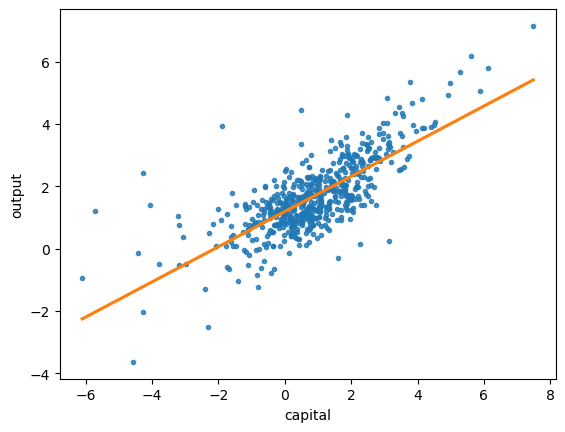

In [9]:
sns.regplot(x=np.log(Labour_df['capital']), y=np.log(Labour_df['output']), ci=False, marker='.', line_kws={'color':'C1'})